In [28]:
import pandas as pd
import numpy as np
import yfinance as yf

In [17]:
ticker_symbol = 'AAPL'

ticker_data = yf.Ticker(ticker_symbol)

hist = ticker_data.history(period="1mo")

print(hist)

average_close = hist['Close'].mean()
print(f"Average closing price over the last month for {
      ticker_symbol}: {average_close}")

                                 Open        High         Low       Close  \
Date                                                                        
2024-05-22 00:00:00-04:00  192.270004  192.820007  190.270004  190.899994   
2024-05-23 00:00:00-04:00  190.979996  191.000000  186.630005  186.880005   
2024-05-24 00:00:00-04:00  188.820007  190.580002  188.039993  189.979996   
2024-05-28 00:00:00-04:00  191.509995  193.000000  189.100006  189.990005   
2024-05-29 00:00:00-04:00  189.610001  192.250000  189.509995  190.289993   
2024-05-30 00:00:00-04:00  190.759995  192.179993  190.630005  191.289993   
2024-05-31 00:00:00-04:00  191.440002  192.570007  189.910004  192.250000   
2024-06-03 00:00:00-04:00  192.899994  194.990005  192.520004  194.029999   
2024-06-04 00:00:00-04:00  194.639999  195.320007  193.029999  194.350006   
2024-06-05 00:00:00-04:00  195.399994  196.899994  194.869995  195.869995   
2024-06-06 00:00:00-04:00  195.690002  196.500000  194.169998  194.479996   

#instinct value of stock

In [18]:
import yfinance as yf

# Function to get financial data for CAPM and WACC calculation


def get_financial_data(ticker):
    stock = yf.Ticker(ticker)

    # Get Beta for CAPM calculation
    beta = stock.info['beta']

    # Risk-Free Rate (Rf): Current yield on 10-year U.S. Treasury bonds (approximately 3.5% or 0.035)
    risk_free_rate = 0.044

    # Equity Risk Premium (ERP): Typical value around 5% (0.05)
    equity_risk_premium = 0.05

    # Cost of Debt (Rd): Average interest rate on Apple's debt (Approximate value from financial statements or Yahoo Finance)
    cost_of_debt = 0.02  # Example: 2% as an assumed cost of debt

    # Market Values
    market_cap = stock.info['marketCap']  # Market value of equity (E)
    total_debt = stock.info['totalDebt']  # Market value of debt (D)

    # Calculate total value (V)
    total_value = market_cap + total_debt

    # Corporate Tax Rate (Tc): Effective tax rate from financial statements or Yahoo Finance
    # Example: 21% tax rate (should be updated based on financial statements)
    tax_rate = 0.21

    return beta, risk_free_rate, equity_risk_premium, cost_of_debt, market_cap, total_debt, total_value, tax_rate

# Function to calculate Cost of Equity using CAPM


def calculate_cost_of_equity(beta, risk_free_rate, equity_risk_premium):
    # CAPM Formula: Cost of Equity = Risk-Free Rate + Beta x Equity Risk Premium
    cost_of_equity = risk_free_rate + beta * equity_risk_premium
    return cost_of_equity

# Function to calculate WACC


def calculate_wacc(ticker):
    # Get financial data
    beta, risk_free_rate, equity_risk_premium, cost_of_debt, market_cap, total_debt, total_value, tax_rate = get_financial_data(
        ticker)

    # Calculate Cost of Equity
    cost_of_equity = calculate_cost_of_equity(
        beta, risk_free_rate, equity_risk_premium)

    # Calculate weights
    equity_weight = market_cap / total_value
    debt_weight = total_debt / total_value

    # WACC Formula
    wacc = (equity_weight * cost_of_equity) + \
        (debt_weight * cost_of_debt * (1 - tax_rate))

    return wacc, cost_of_equity, cost_of_debt, equity_weight, debt_weight


# Example usage
ticker = "AAPL"  # Apple Inc.
wacc, cost_of_equity, cost_of_debt, equity_weight, debt_weight = calculate_wacc(
    ticker)
print(f"The WACC for {ticker} is: {wacc * 100:.2f}%")
print(f"Cost of Equity: {cost_of_equity * 100:.2f}%")
print(f"Cost of Debt: {cost_of_debt * 100:.2f}%")
print(f"Equity Weight: {equity_weight * 100:.2f}%")
print(f"Debt Weight: {debt_weight * 100:.2f}%")

The WACC for AAPL is: 10.36%
Cost of Equity: 10.65%
Cost of Debt: 2.00%
Equity Weight: 96.82%
Debt Weight: 3.18%


In [19]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to get financial data for CAPM and equity valuation


def get_financial_data(ticker):
    stock = yf.Ticker(ticker)

    # Get Beta for CAPM calculation
    beta = stock.info['beta']

    # Risk-Free Rate (Rf): Current yield on 10-year U.S. Treasury bonds (approximately 3.5% or 0.035)
    risk_free_rate = 0.035

    # Equity Risk Premium (ERP): Typical value around 5% (0.05)
    equity_risk_premium = 0.05

    return beta, risk_free_rate, equity_risk_premium

# Function to calculate Cost of Equity using CAPM


def calculate_cost_of_equity(beta, risk_free_rate, equity_risk_premium):
    # CAPM Formula: Cost of Equity = Risk-Free Rate + Beta x Equity Risk Premium
    cost_of_equity = risk_free_rate + beta * equity_risk_premium
    return cost_of_equity

# Function to fetch historical financial data for FCFE calculation


def get_historical_financials(ticker):
    stock = yf.Ticker(ticker)

    # Fetch financials
    financials = stock.financials
    balance_sheet = stock.balance_sheet
    cashflow = stock.cashflow

    # Print the available keys to debug and understand the structure
    print("Financials columns:", financials.index)
    print("Balance Sheet columns:", balance_sheet.index)
    print("Cash Flow columns:", cashflow.index)

    # Ensure the data is sorted in descending order of date
    financials = financials.T.sort_index(ascending=False)
    balance_sheet = balance_sheet.T.sort_index(ascending=False)
    cashflow = cashflow.T.sort_index(ascending=False)

    return financials, balance_sheet, cashflow

# Function to calculate FCFE (Free Cash Flow to Equity)


def calculate_fcfe(financials, balance_sheet, cashflow):
    # Adjust key names based on the available data
    net_income = financials.get('Net Income', financials.get(
        'Net Income Applicable to Common Shares'))
    depreciation = cashflow.get(
        'Depreciation', cashflow.get('Depreciation & Amortization'))
    capex = cashflow.get('Capital Expenditures', cashflow.get(
        'Investment in Property, Plant and Equipment'))
    change_in_working_capital = (
        balance_sheet.get('Total Current Assets', balance_sheet.get('Current Assets')).diff() -
        balance_sheet.get('Total Current Liabilities',
                          balance_sheet.get('Current Liabilities')).diff()
    )
    net_borrowing = cashflow.get(
        'Issuance (Retirement) of Debt, Net', cashflow.get('Repurchase of Debt'))

    # Check if any value is None and handle appropriately
    if net_income is None:
        raise ValueError("Net Income data not found.")
    if depreciation is None:
        raise ValueError("Depreciation data not found.")
    if capex is None:
        raise ValueError("Capital Expenditures data not found.")
    if change_in_working_capital is None:
        raise ValueError("Change in Working Capital data not found.")
    if net_borrowing is None:
        raise ValueError("Net Borrowing data not found.")

    # Negate CapEx as it's a cash outflow
    capex = -capex

    # FCFE formula
    fcfe = net_income + depreciation + capex - \
        change_in_working_capital + net_borrowing
    return fcfe

# Function to calculate intrinsic value of equity using FCFE and Cost of Equity


def calculate_intrinsic_value_equity(ticker, growth_rate, num_years=5):
    # Get financial data for CAPM calculation
    beta, risk_free_rate, equity_risk_premium = get_financial_data(ticker)

    # Calculate Cost of Equity
    cost_of_equity = calculate_cost_of_equity(
        beta, risk_free_rate, equity_risk_premium)

    # Get historical financials
    financials, balance_sheet, cashflow = get_historical_financials(ticker)

    # Calculate FCFE
    fcfe = calculate_fcfe(financials, balance_sheet, cashflow)
    latest_fcfe = fcfe.iloc[0]

    # Project future FCFE based on the growth rate
    projected_fcfe = [
        latest_fcfe * (1 + growth_rate) ** year for year in range(1, num_years + 1)]

    # Discount the projected FCFE to present value
    discount_factors = [(1 / (1 + cost_of_equity) ** year)
                        for year in range(1, num_years + 1)]
    present_value_fcfe = [fcfe * discount for fcfe,
                          discount in zip(projected_fcfe, discount_factors)]

    # Sum the present values to get the intrinsic value
    intrinsic_value_equity = sum(present_value_fcfe)

    # Get the number of shares outstanding to calculate the intrinsic value per share
    stock = yf.Ticker(ticker)
    shares_outstanding = stock.info['sharesOutstanding']

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Shares outstanding data not available for {ticker}")
        return None, None

    intrinsic_value_per_share = intrinsic_value_equity / shares_outstanding

    return intrinsic_value_per_share, projected_fcfe, present_value_fcfe, cost_of_equity


# Example usage
ticker = "AAPL"  # Apple Inc.
growth_rate = 0.05  # 5% annual growth rate

try:
    intrinsic_value_per_share, projected_fcfe, present_value_fcfe, cost_of_equity = calculate_intrinsic_value_equity(
        ticker, growth_rate)
    if intrinsic_value_per_share is not None:
        print(f"The estimated intrinsic value per share of {
              ticker} is: ${intrinsic_value_per_share:.2f}")
        print(f"Cost of Equity: {cost_of_equity * 100:.2f}%")

        # Plot the projected and discounted FCFE
        years = range(1, len(projected_fcfe) + 1)
        plt.figure(figsize=(10, 6))

        # Plot the projected FCFE
        plt.plot(years, projected_fcfe, label='Projected FCFE', marker='o')
        plt.plot(years, present_value_fcfe,
                 label='Discounted FCFE', marker='x')
        plt.xlabel('Year')
        plt.ylabel('Free Cash Flow to Equity (USD)')
        plt.title(f'Projected and Discounted FCFE for {ticker}')
        plt.legend()
        plt.grid(True)
        plt.show()
except ValueError as e:
    print(e)

Financials columns: Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Net Non Operating Interest Income Expense',
       'Interest Expense Non Operating', 'Interest Income Non Operating',
  

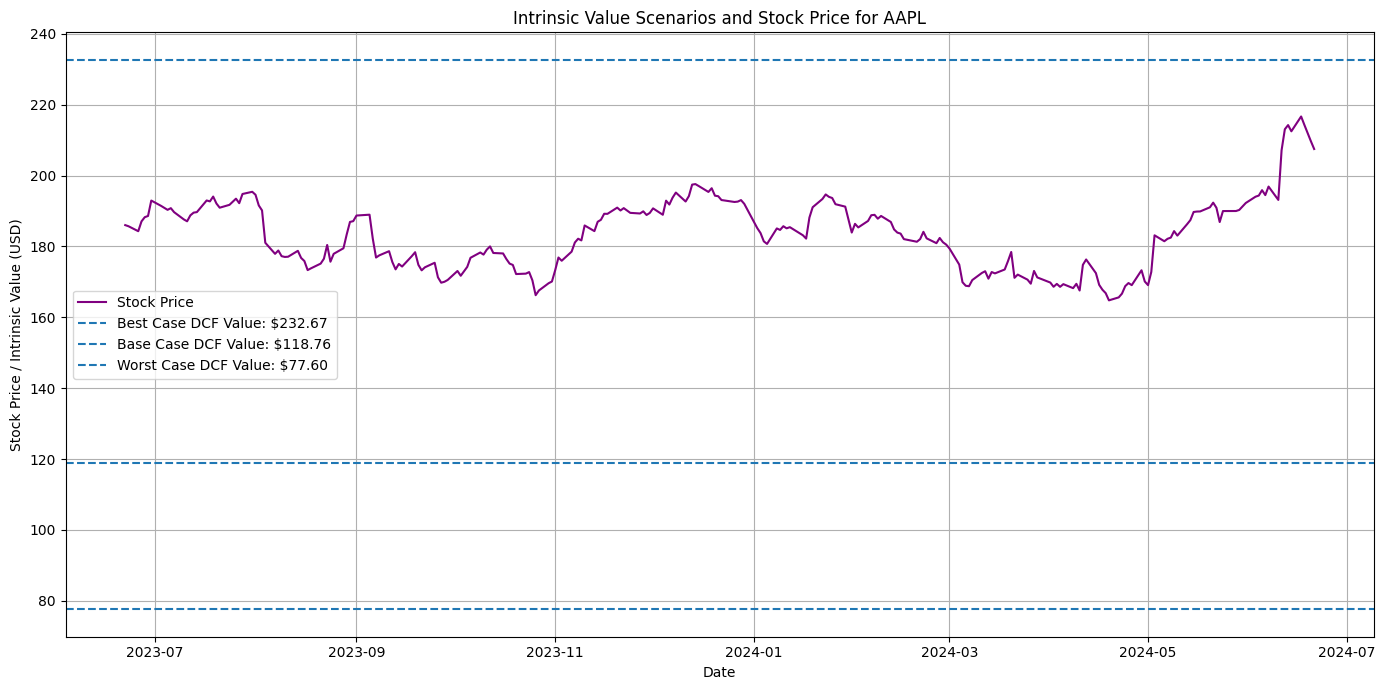

In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch Free Cash Flow (FCF) data from Yahoo Finance


def get_fcf(ticker):
    stock = yf.Ticker(ticker)
    cash_flow = stock.cashflow
    if 'Free Cash Flow' in cash_flow.index:
        fcf = cash_flow.loc['Free Cash Flow']
        return fcf
    else:
        print(f"Free Cash Flow data not available for {ticker}")
        return None

# Function to fetch historical stock prices


def get_stock_prices(ticker, period='1y'):
    stock = yf.Ticker(ticker)
    history = stock.history(period=period)
    return history

# Function to fetch key statistics for relative valuation


def get_key_statistics(ticker):
    stock = yf.Ticker(ticker)
    stats = stock.info
    return stats

# Function to calculate DCF intrinsic value per share


def calculate_dcf_per_share(ticker, growth_rate, discount_rate, num_years=10, terminal_growth_rate=0.02):
    fcf = get_fcf(ticker)
    if fcf is None:
        return None, None, None

    # Get the latest FCF value
    latest_fcf = fcf.iloc[0]

    # Project future FCF based on the growth rate
    projected_fcf = [latest_fcf * (1 + growth_rate)
                     ** year for year in range(1, num_years + 1)]

    # Calculate the terminal value
    terminal_value = projected_fcf[-1] * (1 + terminal_growth_rate) / (
        discount_rate - terminal_growth_rate)

    # Discount the projected FCF to present value
    discount_factors = [(1 / (1 + discount_rate) ** year)
                        for year in range(1, num_years + 1)]
    present_value_fcf = [fcf * discount for fcf,
                         discount in zip(projected_fcf, discount_factors)]

    # Discount the terminal value to present value
    terminal_value_discounted = terminal_value / \
        ((1 + discount_rate) ** num_years)

    # Sum the present values to get the total intrinsic value
    total_intrinsic_value = sum(present_value_fcf) + terminal_value_discounted

    # Get the number of shares outstanding to calculate the intrinsic value per share
    stock = yf.Ticker(ticker)
    shares_outstanding = stock.info['sharesOutstanding']

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Shares outstanding data not available for {ticker}")
        return None, None, None

    intrinsic_value_per_share = total_intrinsic_value / shares_outstanding

    return intrinsic_value_per_share, projected_fcf, present_value_fcf

# Function to calculate relative value based on multiples


def calculate_relative_value(ticker):
    stats = get_key_statistics(ticker)
    try:
        pe_ratio = stats['forwardPE']
        pb_ratio = stats['priceToBook']
        ps_ratio = stats['priceToSalesTrailing12Months']
        price = stats['currentPrice']
        earnings_per_share = stats['forwardEps']
    except KeyError as e:
        print(f"Key statistic not available: {e}")
        return None, None

    # Calculate intrinsic value based on PE ratio
    intrinsic_value_pe = pe_ratio * earnings_per_share

    # Calculate intrinsic value based on PB ratio (Book Value)
    book_value_per_share = price / pb_ratio

    return intrinsic_value_pe, book_value_per_share

# Function to plot all scenarios on a single graph


def plot_all_scenarios(ticker, scenarios):
    stock_prices = get_stock_prices(ticker)

    # Prepare data for plotting
    scenario_data = {}
    for scenario, params in scenarios.items():
        intrinsic_value_per_share, projected_fcf, discounted_fcf = calculate_dcf_per_share(
            ticker, params['growth_rate'], params['discount_rate'], num_years=10, terminal_growth_rate=params['terminal_growth_rate']
        )
        scenario_data[scenario] = intrinsic_value_per_share

    # Plot the historical stock price and intrinsic values from all scenarios
    plt.figure(figsize=(14, 7))

    # Plot the historical stock price
    plt.plot(stock_prices.index,
             stock_prices['Close'], label='Stock Price', color='purple')

    # Plot the intrinsic value per share for each scenario
    for scenario, intrinsic_value in scenario_data.items():
        plt.axhline(y=intrinsic_value, linestyle='--',
                    label=f'{scenario} DCF Value: ${intrinsic_value:.2f}')

    plt.xlabel('Date')
    plt.ylabel('Stock Price / Intrinsic Value (USD)')
    plt.title(f'Intrinsic Value Scenarios and Stock Price for {ticker}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Define best-case, base-case, and worst-case scenarios for DCF
scenarios = {
    # Higher growth, lower discount
    "Best Case": {"growth_rate": 0.10, "discount_rate": 0.08, "terminal_growth_rate": 0.03},
    # Moderate growth and discount
    "Base Case": {"growth_rate": 0.07, "discount_rate": 0.10, "terminal_growth_rate": 0.02},
    # Lower growth, higher discount
    "Worst Case": {"growth_rate": 0.05, "discount_rate": 0.12, "terminal_growth_rate": 0.01}
}

# Example usage
ticker = "AAPL"  # Apple Inc.
plot_all_scenarios(ticker, scenarios)

In [29]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input, Concatenate
from datetime import datetime

In [22]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install --upgrade pip

UnboundLocalError: cannot access local variable 'child' where it is not associated with a value

In [ ]:
data = yf.download('AAPL', start='2008-01-01',
                   end=datetime.now().strftime('%Y-%m-%d'))
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,7.116786,7.152143,6.876786,6.958571,5.883143,1079178800
2008-01-03,6.978929,7.049643,6.881786,6.961786,5.885861,842066400
2008-01-04,6.837500,6.892857,6.388929,6.430357,5.436564,1455832000
2008-01-07,6.473214,6.557143,6.079643,6.344286,5.363793,2072193200
2008-01-08,6.433571,6.516429,6.100000,6.116071,5.170849,1523816000
...,...,...,...,...,...,...
2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,70122700
2024-06-17,213.369995,218.949997,212.720001,216.669998,216.669998,93728300
2024-06-18,217.589996,218.630005,213.000000,214.289993,214.289993,79943300


[*********************100%%**********************]  1 of 1 completed

Epoch 1/50


103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0130 - val_loss: 0.0013
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0023 - val_loss: 9.2727e-04
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 10/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 11/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0025 - val_loss: 9.0949e-04
Epoch 12/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 

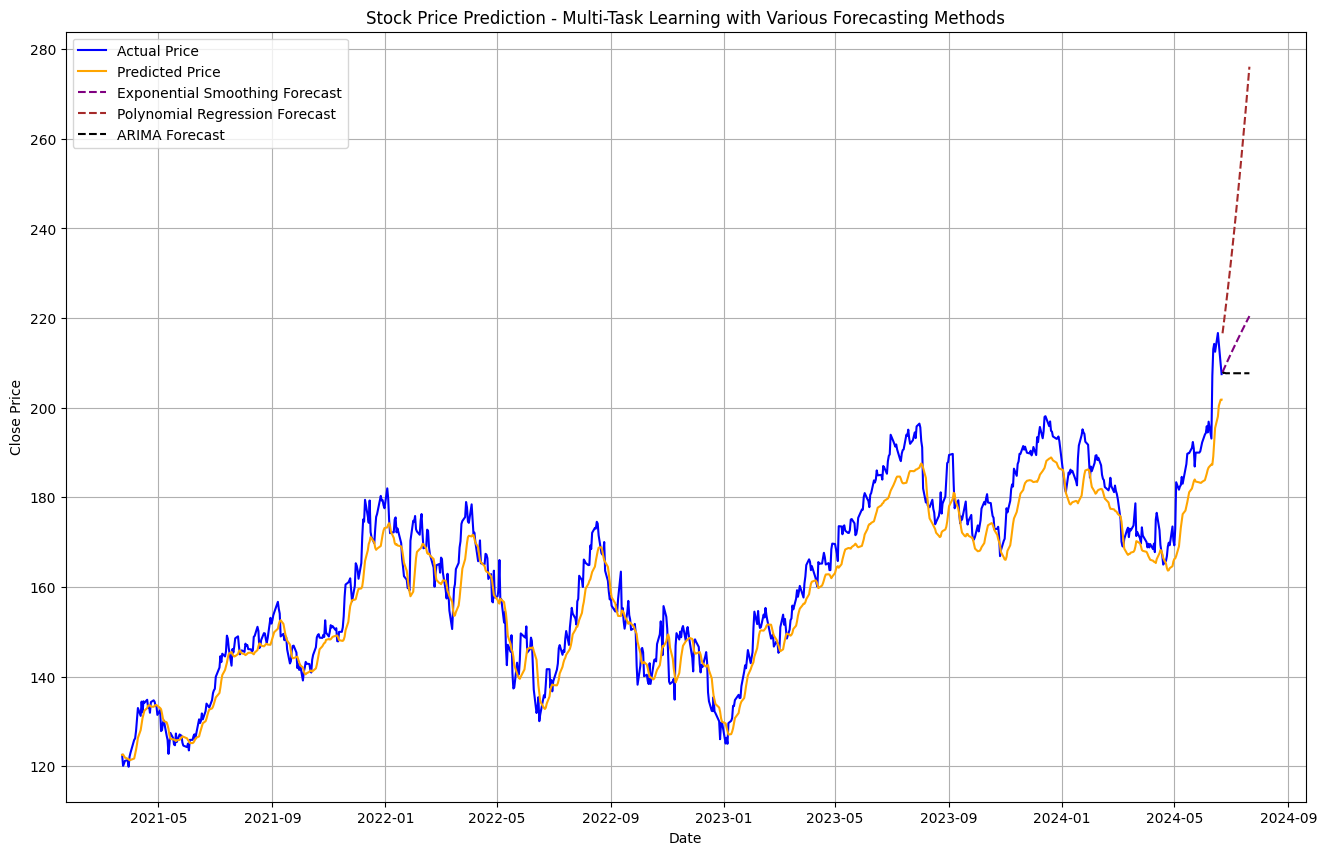

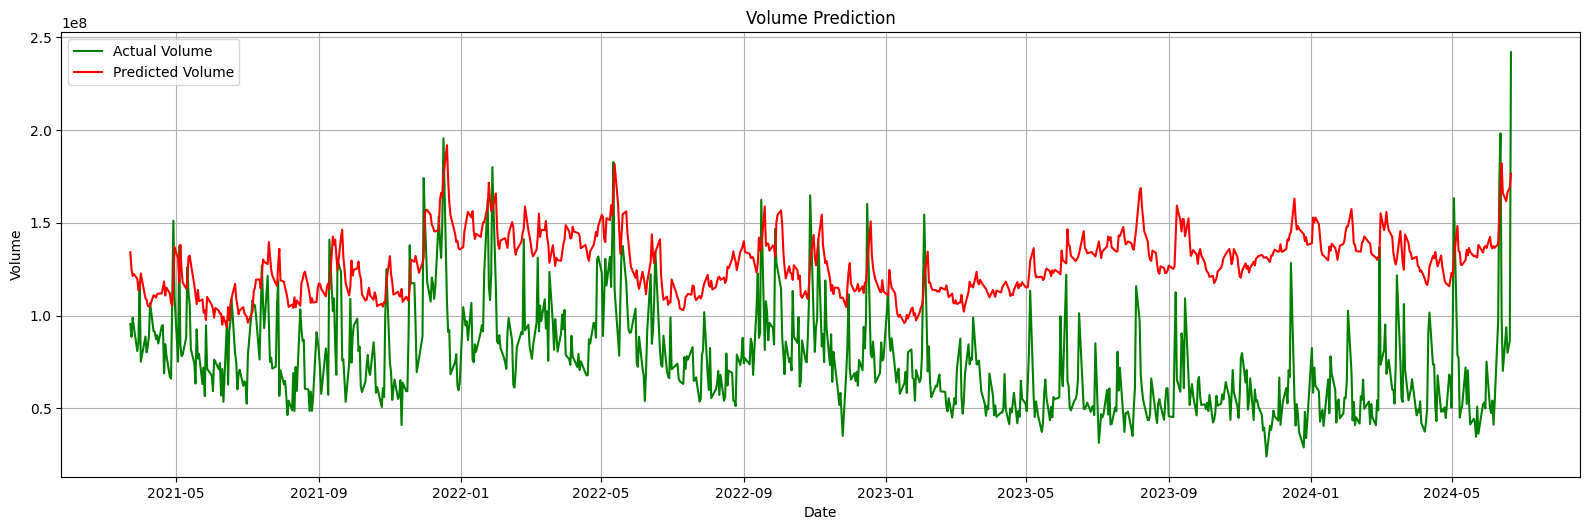

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 60, 2)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_30 (LSTM)      │ (None, 60, 50)    │     10,600 │ input_layer_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_30          │ (None, 60, 50)    │          0 │ lstm_30[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_31 (LSTM)      │ (None, 50)        │     20,200 │ dropout_30[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_31          │ (None, 50)        │          0 │ lstm_31[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_price        │ (None, 1)         │         51 │ dropout_31[0][0]  │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_volume       │ (None, 1)         │         51 │ dropout_31[0][0]  │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 92,708 (362.14 KB)

 Trainable params: 30,902 (120.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,806 (241.43 KB)

In [54]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from datetime import datetime

# Download data
data = yf.download('AAPL', start='2008-01-01',
                   end=datetime.now().strftime('%Y-%m-%d'))

# Preprocess data for Close price and Volume
scaler_price = MinMaxScaler(feature_range=(0, 1))
scaler_volume = MinMaxScaler(feature_range=(0, 1))

data_scaled_price = scaler_price.fit_transform(
    data['Close'].values.reshape(-1, 1))
data_scaled_volume = scaler_volume.fit_transform(
    data['Volume'].values.reshape(-1, 1))

# Combine the scaled data
data_combined = np.concatenate((data_scaled_price, data_scaled_volume), axis=1)

# Create sequences


def create_sequences(data, seq_length):
    X = []
    y_price = []
    y_volume = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y_price.append(data[i + seq_length, 0])  # Next close price
        y_volume.append(data[i + seq_length, 1])  # Next volume
    return np.array(X), np.array(y_price), np.array(y_volume)


seq_length = 60
X, y_price, y_volume = create_sequences(data_combined, seq_length)

# Split into training and test sets (80% training, 20% testing)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train_price, y_test_price = y_price[:split], y_price[split:]
y_train_volume, y_test_volume = y_volume[:split], y_volume[split:]

# Ensure all target arrays have the same length
assert len(X_train) == len(y_train_price) == len(
    y_train_volume), "Mismatch in training data lengths"
assert len(X_test) == len(y_test_price) == len(
    y_test_volume), "Mismatch in testing data lengths"

# Define the model input
# 2 features: close price and volume
input_layer = Input(shape=(seq_length, 2))

# LSTM layers
x = LSTM(units=50, return_sequences=True)(input_layer)
x = Dropout(0.2)(x)
x = LSTM(units=50, return_sequences=False)(x)
x = Dropout(0.2)(x)

# Outputs for close price and volume
output_price = Dense(units=1, name='output_price')(x)
output_volume = Dense(units=1, name='output_volume')(x)

# Define the model with multiple outputs
model = Model(inputs=input_layer, outputs=[output_price, output_volume])

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train,
                    {'output_price': y_train_price,
                        'output_volume': y_train_volume},
                    epochs=50, batch_size=32, verbose=1,
                    validation_data=(X_test,
                                     {'output_price': y_test_price, 'output_volume': y_test_volume}))

# Making predictions using the trained LSTM model
predictions_price, predictions_volume = model.predict(X_test)

# Inverse transform the predictions to original scale
predictions_price_inverse = scaler_price.inverse_transform(predictions_price)
predictions_volume_inverse = scaler_volume.inverse_transform(
    predictions_volume)

# Forecasting Methods

# 1. Exponential Smoothing Forecast using the most recent sequence
model_es = ExponentialSmoothing(
    data['Close'].values[-seq_length:], trend='add', seasonal=None, damped_trend=True)
es_fit = model_es.fit()
es_forecast = es_fit.forecast(steps=30)

# 2. Polynomial Regression Forecast using the most recent sequence
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)
x_poly = poly.fit_transform(np.array(range(seq_length)).reshape(-1, 1))
# Use the most recent price sequence
y_poly = data_scaled_price[-seq_length:].reshape(-1, 1)

poly_reg_model = LinearRegression().fit(x_poly, y_poly)

future_poly_indices = np.array(
    [seq_length + i for i in range(30)]).reshape(-1, 1)
future_poly_indices_poly = poly.transform(future_poly_indices)
poly_predictions = poly_reg_model.predict(future_poly_indices_poly)
poly_predictions_inverse = scaler_price.inverse_transform(poly_predictions)

# 3. ARIMA Forecast using the entire dataset
arima_model = ARIMA(data['Close'].values, order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=30)


# Extend the dates for future predictions
last_date = data.index[-1]
future_dates = [last_date + np.timedelta64(i, 'D') for i in range(1, 31)]

# Plot the results
plt.figure(figsize=(16, 10))

# Plot actual values
plt.plot(data.index[-len(y_test_price):], scaler_price.inverse_transform(
    y_test_price.reshape(-1, 1)), label='Actual Price', color='blue')

# Plot predictions from LSTM
plt.plot(data.index[-len(predictions_price_inverse):],
         predictions_price_inverse, label='Predicted Price', color='orange')

# Plot Exponential Smoothing forecast
plt.plot(future_dates, es_forecast,
         label='Exponential Smoothing Forecast', linestyle='--', color='purple')

# Plot Polynomial Regression forecast
plt.plot(future_dates, poly_predictions_inverse,
         label='Polynomial Regression Forecast', linestyle='--', color='brown')

# Plot ARIMA forecast
plt.plot(future_dates, arima_forecast, label='ARIMA Forecast',
         linestyle='--', color='black')
# Labels and title
plt.title('Stock Price Prediction - Multi-Task Learning with Various Forecasting Methods')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show() 

# Plot actual and predicted close prices
#plt.subplot(2, 1, 1)
#plt.plot(data.index[-len(y_test_price):], scaler_price.inverse_transform(
#    y_test_price.reshape(-1, 1)), label='Actual Price', color='blue')
#plt.plot(data.index[-len(predictions_price_inverse):],
#         predictions_price_inverse, label='Predicted Price', color='orange')
#plt.title('Stock Price Prediction')
#plt.xlabel('Date')
#plt.ylabel('Close Price')
#plt.legend()
#plt.grid(True)

# Plot actual and predicted volumes
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 2)
plt.plot(data.index[-len(y_test_volume):], scaler_volume.inverse_transform(
    y_test_volume.reshape(-1, 1)), label='Actual Volume', color='green')
plt.plot(data.index[-len(predictions_volume_inverse):],
         predictions_volume_inverse, label='Predicted Volume', color='red')
plt.title('Volume Prediction')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

model.summary()

/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_11939/3324702684.py:9: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  intersections = fsolve(f, initial_guesses)


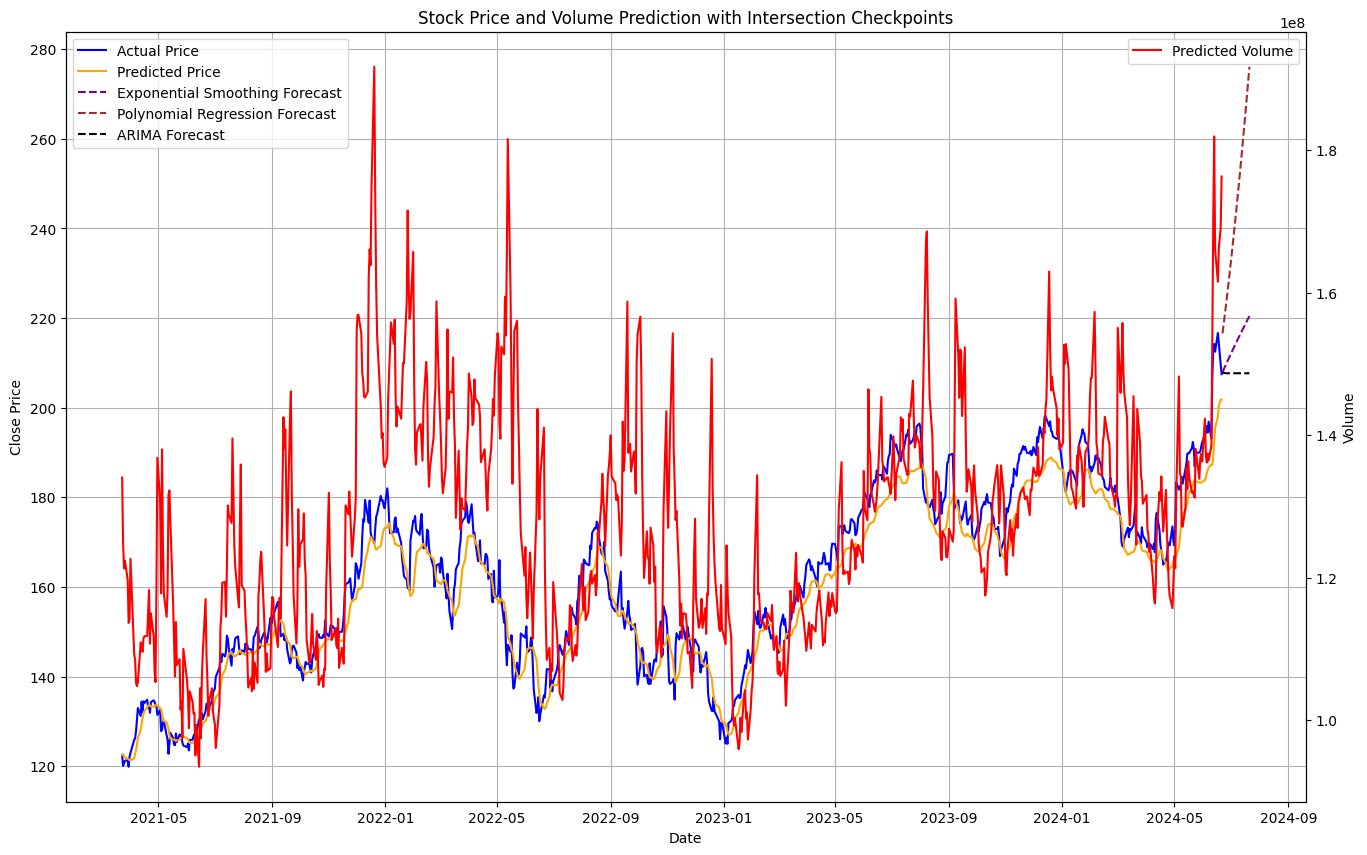

In [57]:
def find_intersections(y1, y2):
    def f(x):
        return np.interp(x, np.arange(len(y1)), y1) - np.interp(x, np.arange(len(y2)), y2)

    # Initial guess for intersections are all the points in the range
    initial_guesses = np.arange(len(y1))

    # Use fsolve to find roots of the difference function
    intersections = fsolve(f, initial_guesses)

    # Filter only valid intersections within the range
    valid_intersections = intersections[(
        intersections >= 0) & (intersections < len(y1))]

    # Return unique, rounded intersection indices
    return np.unique(np.round(valid_intersections).astype(int))


intersections_es = find_intersections(
    predictions_price_inverse[-30:].flatten(), es_forecast.flatten())
intersections_poly = find_intersections(
    predictions_price_inverse[-30:].flatten(), poly_predictions_inverse.flatten())
intersections_arima = find_intersections(
    predictions_price_inverse[-30:].flatten(), arima_forecast.flatten())


# Convert intersection indices to dates
intersection_dates_es = [future_dates[i] for i in intersections_es]
intersection_dates_poly = [future_dates[i] for i in intersections_poly]
intersection_dates_arima = [future_dates[i] for i in intersections_arima]


# Plot the integrated results
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plot actual and predicted close prices on the primary y-axis
ax1.plot(data.index[-len(y_test_price):], scaler_price.inverse_transform(
    y_test_price.reshape(-1, 1)), label='Actual Price', color='blue')
ax1.plot(data.index[-len(predictions_price_inverse):],
         predictions_price_inverse, label='Predicted Price', color='orange')
ax1.plot(future_dates, es_forecast,
         label='Exponential Smoothing Forecast', linestyle='--', color='purple')
ax1.plot(future_dates, poly_predictions_inverse,
         label='Polynomial Regression Forecast', linestyle='--', color='brown')
ax1.plot(future_dates, arima_forecast, label='ARIMA Forecast',
         linestyle='--', color='black')


# Mark intersections
for i in intersections_es:
    date = future_dates[i]
    ax1.axvline(date, color='purple', linestyle=':', alpha=0.7)
    ax1.plot(date, es_forecast[i], 'X', color='purple', markersize=10)
for i in intersections_poly:
    date = future_dates[i]
    ax1.axvline(date, color='brown', linestyle=':', alpha=0.7)
    ax1.plot(date, poly_predictions_inverse[i],
             'X', color='brown', markersize=10)
for i in intersections_arima:
    date = future_dates[i]
    ax1.axvline(date, color='black', linestyle=':', alpha=0.7)
    ax1.plot(date, arima_forecast[i], 'X', color='black', markersize=10)

# Set the labels and title for the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')
ax1.set_title(
    'Stock Price and Volume Prediction with Intersection Checkpoints')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a secondary y-axis for volume
ax2 = ax1.twinx()

# Plot predicted volume on the secondary y-axis
ax2.plot(data.index[-len(predictions_volume_inverse):],
         predictions_volume_inverse, label='Predicted Volume', color='red')

ax2.set_ylabel('Volume')

# Set the legend for the secondary y-axis
ax2.legend(loc='upper right')

plt.show()